In [3]:
import pandas as pd
from scipy.stats import shapiro, probplot
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("datos_simulados.csv")

df.head()

,horas_estudio,notas
0,Más de 6 horas,88.4927
1,0-3 horas,68.8775
2,Más de 6 horas,90.3660
3,Más de 6 horas,89.5300
4,0-3 horas,57.9283


In [28]:
# Realizar ANOVA
model = sm.OLS(df['notas'], sm.add_constant(df.index)).fit()
residuos = model.resid
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  notas   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.397
Date:                Thu, 27 Jun 2024   Prob (F-statistic):              0.240
Time:                        08:24:21   Log-Likelihood:                -404.36
No. Observations:                 100   AIC:                             812.7
Df Residuals:                      98   BIC:                             817.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         78.1005      2.767     28.224      0.000      72.609      83.592
x1            -0.0571      0.048     -1.182      0.240      -0.153       0.039
==============================================================================
Omnibus:                        8.484   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                6.083
Skew:                          -0.475   Prob(JB):                       0.0478
Kurtosis:                       2.253   Cond. No.                         114.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# Prueba de Kolmogorov-Smirnov
_, p_valor = shapiro(residuos)
print(p_valor)

0.0008671109098941088


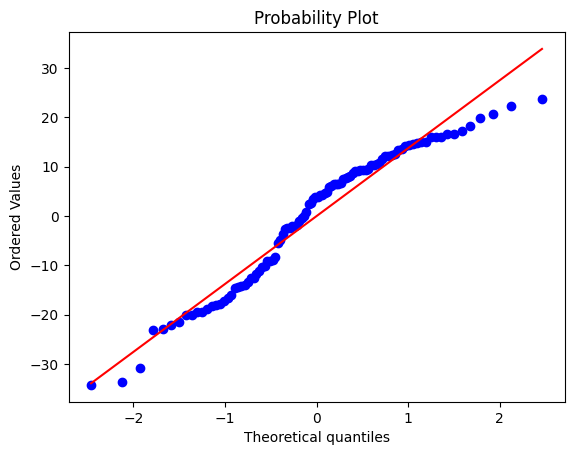

In [16]:
# Gráfico QQ-plot
probplot(residuos, plot=plt)
plt.show()